In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

# Importing data

In [2]:
data = pd.read_csv('nyc_covid_latest.csv')
data['REPORTING_DATE'] = pd.to_datetime(data['REPORTING_DATE'], format='%Y-%m-%d')
data['DATE_OF_INTEREST'] = pd.to_datetime(data['DATE_OF_INTEREST'], format='%Y-%m-%d')
data

,REPORTING_DATE,DATE_OF_INTEREST,CASES,HOSPITALIZED,DEATHS
0,2020-03-26,2020-03-02,1,0,0
1,2020-03-26,2020-03-03,2,3,0
2,2020-03-26,2020-03-04,9,3,0
3,2020-03-26,2020-03-05,1,4,0
4,2020-03-26,2020-03-06,8,5,0
...,...,...,...,...,...
3286,2020-05-26,2020-05-21,788,54,33
3287,2020-05-26,2020-05-22,564,60,33
3288,2020-05-26,2020-05-23,216,19,21
3289,2020-05-26,2020-05-24,106,2,9


# Looking at deltas

[]

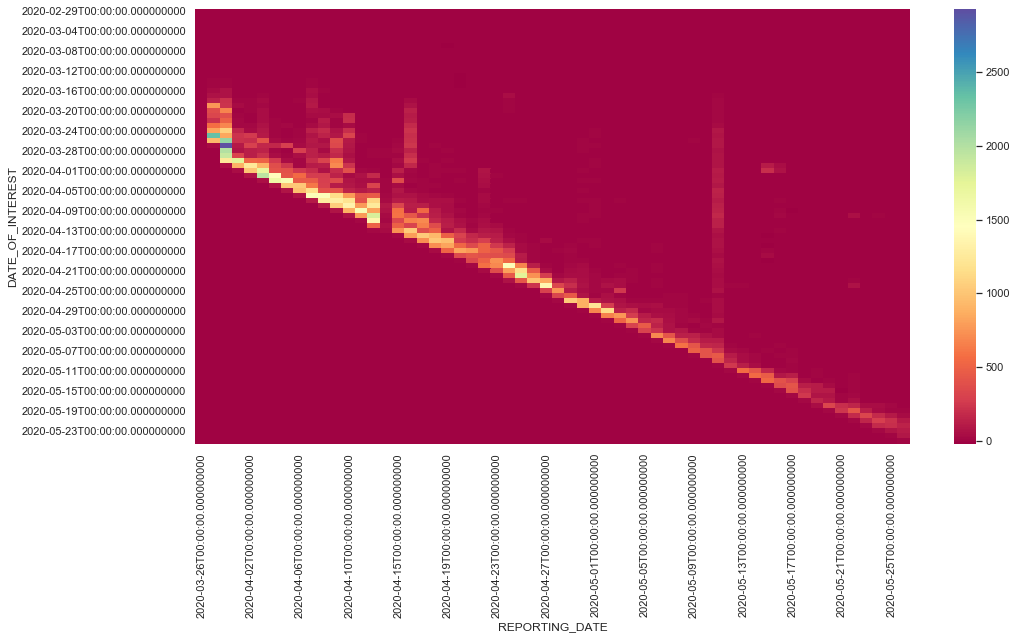

In [3]:
cases = data.pivot(index='DATE_OF_INTEREST', columns='REPORTING_DATE', values='CASES').fillna(0)
deltas = cases.diff(axis=1).fillna(0)
plt.figure(figsize=(16, 8))
sns.heatmap(deltas, cmap='Spectral', xticklabels=4, yticklabels=4)
plt.plot()

In [4]:
histo = data.pivot(index='DATE_OF_INTEREST', columns='REPORTING_DATE', values='DEATHS').fillna(0)
histo = histo.diff(axis=1).fillna(0)
histo

REPORTING_DATE,2020-03-26,2020-03-27,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,...,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26
DATE_OF_INTEREST,,,,,,,,,,,,,,,,,,,,,
2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,14.0,8.0,0.0,10.0
2020-05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,3.0,17.0
2020-05-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,18.0


# How the moving average changes over time
NY state will reopen based on the moving average of hospitalizations. How does that change over time based on reporting date?

In [5]:
# NYC population = 8,340,000
# https://www1.nyc.gov/site/planning/planning-level/nyc-population/nyc-population.page
# https://forward.ny.gov/regional-monitoring-dashboard
population = 8340000
d = data.copy()
d.index = d['DATE_OF_INTEREST']
d['HOSPITALIZED'] = d['HOSPITALIZED'] / population * 100000
d['CASES'] = d['CASES'] / population * 100000
d['DEATHS'] = d['DEATHS'] / population * 100000

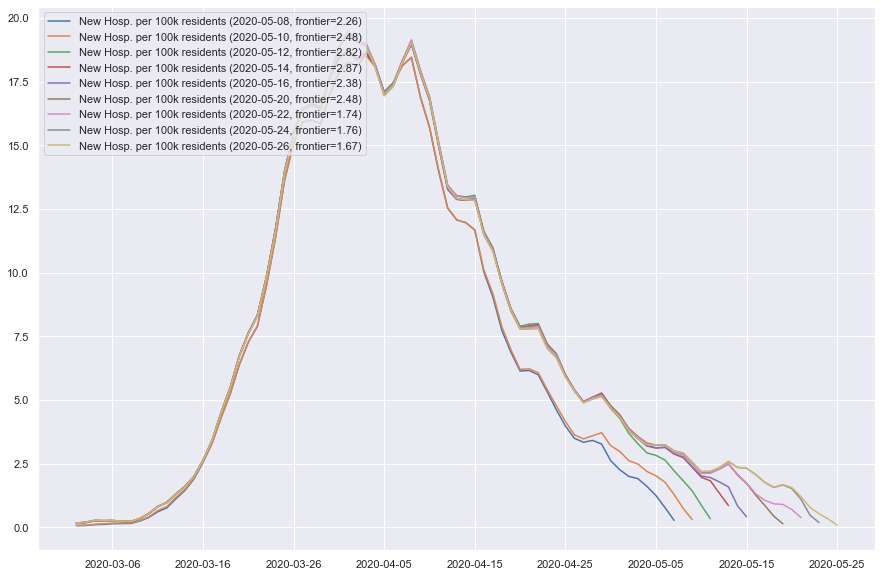

In [6]:
dates = [f'2020-05-{d:02}' for d in [8,10,12,14,16,20,22,24,26]]

plt.figure(figsize=[15,10])

for date in dates:
    day = d[d['REPORTING_DATE'] == date]
    sma3 = day.iloc[:,3].rolling(window=3).mean()
    plt.plot(sma3,label=f'New Hosp. per 100k residents ({date}, frontier={sma3[-7]:.2f})')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.legend(loc=2)